In [1]:
from bs4 import BeautifulSoup
import urllib.request,sys,time
import requests
import pandas as pd
import re
from collections import defaultdict
import seaborn as sns

In [3]:
fulldf = pd.read_csv('politifact_data.csv')
topSources = fulldf['Source'].value_counts().head(15)
topSourcesdf = topSources.to_frame().reset_index()
topSourcesdf.rename(columns={'Source':'Count'}, inplace=True)
topSourcesdf.rename(columns={'index':'Source'}, inplace=True)
topSourcesdf

,Source,Count
0,Donald Trump,823
1,Facebook posts,747
2,Bloggers,567
3,Barack Obama,541
4,Viral image,433
5,Hillary Clinton,227
6,Scott Walker,205
7,Bernie Sanders,169
8,Rick Perry,168
9,Mitt Romney,166


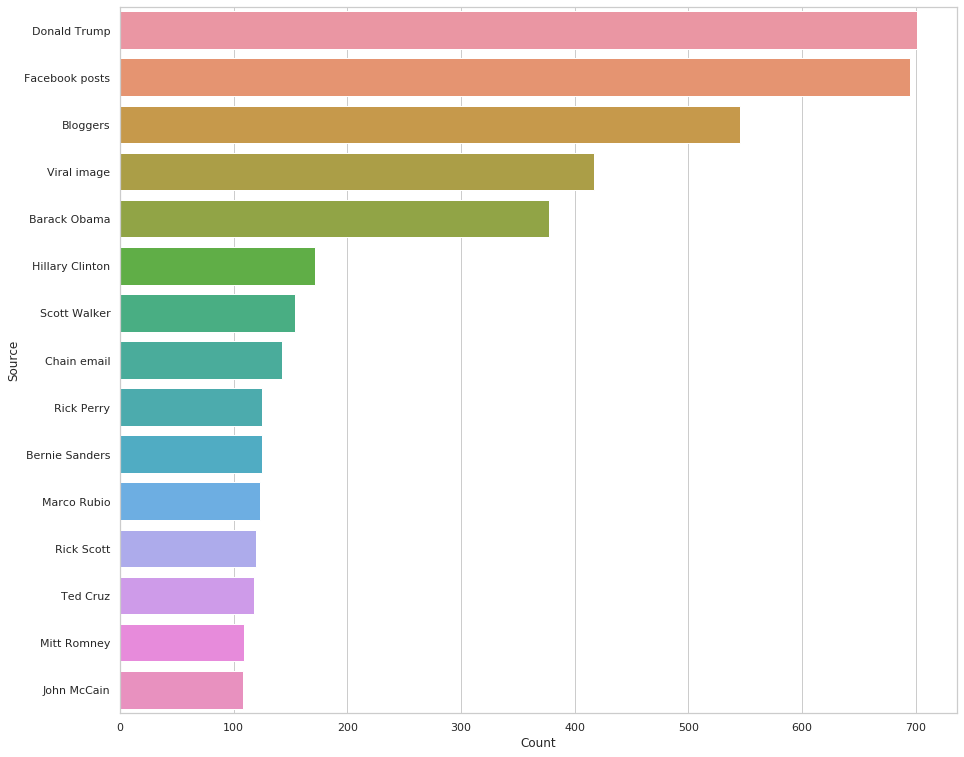

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Count", y="Source", data=topSourcesdf,
            label="Total")


In [4]:
fulldf.groupby('Label').count()

,Quote,Source,Date,Post Author,Link
Label,,,,,
barely-true,2830,2830,2830,2829,2830
false,3672,3672,3672,3669,3672
full-flop,155,155,155,155,155
half-flip,70,70,70,70,70
half-true,3081,3081,3081,3076,3081
mostly-true,2928,2928,2928,2925,2928
no-flip,26,26,26,26,26
pants-fire,2011,2011,2011,2010,2011
true,2207,2207,2207,2200,2207


In [30]:
df.groupby('Label').count()

,Quote,Source,Date,Post Author,Link
Label,,,,,
barely-true,2830,2830,2830,2829,2830
false,3672,3672,3672,3669,3672
mostly-true,2928,2928,2928,2925,2928
pants-fire,2011,2011,2011,2010,2011
true,2207,2207,2207,2200,2207


In [31]:
df = df.loc[(df['Label'] != 'full-flop') & (df['Label'] != 'half-flip') & (df['Label'] != 'no-flip')]

In [26]:
df

,Quote,Source,Date,Post Author,Link,Label
0,No U.S. presidents elected before Donald Trump...,Joe Biden,"July 27, 2020",Sophie Austin,https://www.politifact.com/factchecks/2020/jul...,false
1,The CDC said it “made a mistake” and reduced i...,Viral image,"July 27, 2020",Tom Kertscher,https://www.politifact.com/factchecks/2020/jul...,false
3,The Trump administration has had “zero unfulfi...,Sean Hannity,"July 27, 2020",Bill McCarthy,https://www.politifact.com/factchecks/2020/jul...,false
4,"Quotes Tom Brady as saying, “If anyone on my t...",Tweets,"July 27, 2020",Samantha Putterman,https://www.politifact.com/factchecks/2020/jul...,pants-fire
5,Michigan House “passes bill to ‘voluntarily’ b...,Facebook posts,"July 27, 2020",Madison Czopek,https://www.politifact.com/factchecks/2020/jul...,barely-true
6,Says Sen. Thom Tillis “doesn’t think restauran...,Majority Forward,"July 24, 2020",Paul Specht,https://www.politifact.com/factchecks/2020/jul...,false
7,Says Gov. Gretchen Whitmer “defunded the Michi...,Great Lakes News,"July 24, 2020",Clara Hendrickson,https://www.politifact.com/factchecks/2020/jul...,false
8,"There’s already 10,000 businesses that are not...",Joe Biden,"July 24, 2020",Samantha Putterman,https://www.politifact.com/factchecks/2020/jul...,mostly-true
9,“We're setting record job numbers.”,Donald Trump,"July 24, 2020",Louis Jacobson,https://www.politifact.com/factchecks/2020/jul...,barely-true
10,“PPP on average probably provided a grant of a...,Ron Johnson,"July 24, 2020",Lawrence Andrea,https://www.politifact.com/factchecks/2020/jul...,mostly-true
